In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load the data

In [202]:
data_path = '/Users/johan/IdeaProjects/progmod/src/game_of_life_project/simulation_data/simulation_data1.csv'

data = pd.read_csv(data_path)

In [203]:
data

,Population,Generation,Grid Size,Density
0,32,0,20x20,0.09
1,4,1,20x20,0.09
2,0,2,20x20,0.09
3,0,3,20x20,0.09
4,0,4,20x20,0.09
...,...,...,...,...
7199995,3818,995,300x300,0.57
7199996,3868,996,300x300,0.57
7199997,3871,997,300x300,0.57
7199998,3770,998,300x300,0.57


## Preprocess the data

Train the model on grid size, cell density, and the current time step to predict the next time step

Labels will be the population count

In [204]:
# Grid size in form nxn, make it a single number

data["Grid Size"] = data["Grid Size"].apply(lambda x: int(x.split("x")[0]) * int(x.split("x")[1]))

In [205]:
# Jumble data

data = data.sample(frac=1).reset_index(drop=True)

In [206]:
X = data.drop("Population", axis=1)
y = data["Population"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Create the model

In [209]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaler.fit(X_train)
y_scaler.fit(y_train.values.reshape(-1, 1))

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mean_absolute_error"])

history = model.fit(X_train_scaled, y_train_scaled, epochs=25, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/25
72000/72000 ━━━━━━━━━━━━━━━━━━━━ 70s 829us/step - loss: 0.0689 - mean_absolute_error: 0.1179 - val_loss: 0.0383 - val_mean_absolute_error: 0.1341
Epoch 2/25
72000/72000 ━━━━━━━━━━━━━━━━━━━━ 57s 796us/step - loss: 0.0390 - mean_absolute_error: 0.0990 - val_loss: 0.0280 - val_mean_absolute_error: 0.1026
Epoch 3/25
72000/72000 ━━━━━━━━━━━━━━━━━━━━ 57s 784us/step - loss: 0.0359 - mean_absolute_error: 0.0929 - val_loss: 0.0254 - val_mean_absolute_error: 0.0863
Epoch 4/25
72000/72000 ━━━━━━━━━━━━━━━━━━━━ 60s 836us/step - loss: 0.0342 - mean_absolute_error: 0.0908 - val_loss: 0.0256 - val_mean_absolute_error: 0.0978
Epoch 5/25
72000/72000 ━━━━━━━━━━━━━━━━━━━━ 61s 851us/step - loss: 0.0314 - mean_absolute_error: 0.0880 - val_loss: 0.0243 - val_mean_absolute_error: 0.0908
Epoch 6/25
72000/72000 ━━━━━━━━━━━━━━━━━━━━ 64s 882us/step - loss: 0.0302 - mean_absolute_error: 0.0872 - val_loss: 0.0231 - val_mean_absolute_error: 0.0897
Epoch 7/25
72000/72000 ━━━━━━━━━━━━━━━━━━━━ 63s 875us/step

Text(0, 0.5, 'Loss')

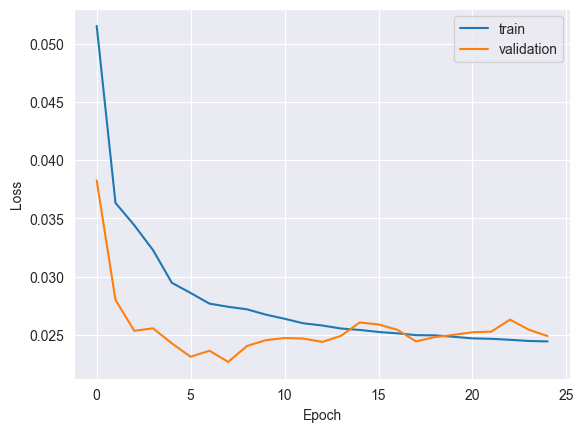

In [211]:
# Plot history of loss

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [210]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (64, 200)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (64, 150)              │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (64, 50)               │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (64, 1)                │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,655 (451.78 KB)

 Trainable params: 38,551 (150.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 77,104 (301.19 KB)

Plot the model

In [212]:
# predict
y_pred = model.predict(X_scaler.transform(X_test))

45000/45000 ━━━━━━━━━━━━━━━━━━━━ 68s 1ms/step


## Make some predictions

In [1]:
generation_max = 1000
grid_size = 100
density = 0.39

X_new = pd.DataFrame({
    "Generation": range(generation_max),
    "Grid Size": [grid_size*grid_size]*generation_max,
    "Density": [density]*generation_max,
})

X_new_scaled = X_scaler.transform(X_new)
y_new_pred_scaled = model.predict(X_new_scaled)
y_new_pred = y_scaler.inverse_transform(y_new_pred_scaled).squeeze()

NameError: name 'pd' is not defined

In [ ]:
filtered_data = data.query(f'`Grid Size` == {grid_size}*{grid_size} and Density == {density}')
filtered_data = filtered_data.sort_values("Generation")
filtered_data = filtered_data.groupby("Generation").mean()

plt.plot(range(len(filtered_data))[:generation_max], filtered_data["Population"][:generation_max], label="Real Population")

plt.plot(range(generation_max), y_new_pred, label="Predicted Population")
plt.legend()

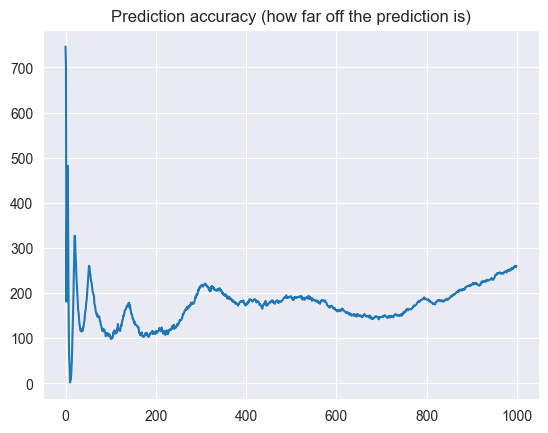

In [228]:
plt.title("Prediction accuracy (how far off the prediction is)")
plt.plot(range(generation_max), abs(y_new_pred - filtered_data["Population"]), label="Absolute Error")